<a href="https://colab.research.google.com/github/Kaushik4636/100-days-of-javascript/blob/master/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import time,datetime

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import calendar

Exploratory Data Analysis on Uber Data

In [2]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv')

In [66]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


In [4]:
#Now lets rename the columns and remove '*' from columns' name.
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]: 'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [5]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [6]:
uber_data[uber_data.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [7]:
uber_data['START'] = uber_data['START'].replace({"\?":"a"}, regex = True)
uber_data["STOP"] = uber_data["STOP"].replace({"\?":"a"}, regex = True)

In [8]:
#make string as datetime to identify individual easily

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR'] =  [x.hour for x in uber_data['START_DATE']]
uber_data['DAY'] =  [x.day for x in uber_data['START_DATE']]
uber_data['MONTH'] =  [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY'] =  [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK'] =  [x.dayofweek for x in uber_data['START_DATE']]

In [9]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


Analysis

<Axes: xlabel='CATEGORY', ylabel='count'>

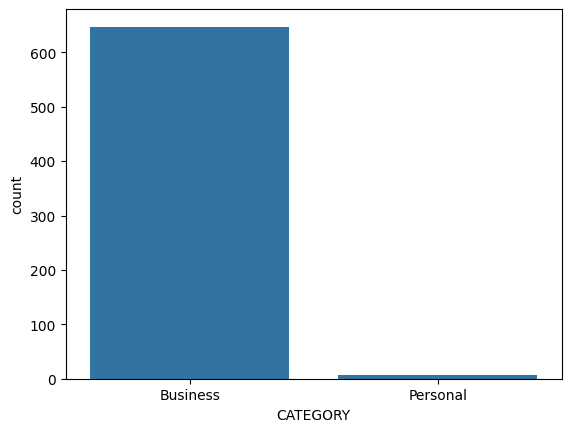

In [10]:
sns . countplot(x= 'CATEGORY' ,data=uber_data)

<Axes: xlabel='count', ylabel='PURPOSE'>

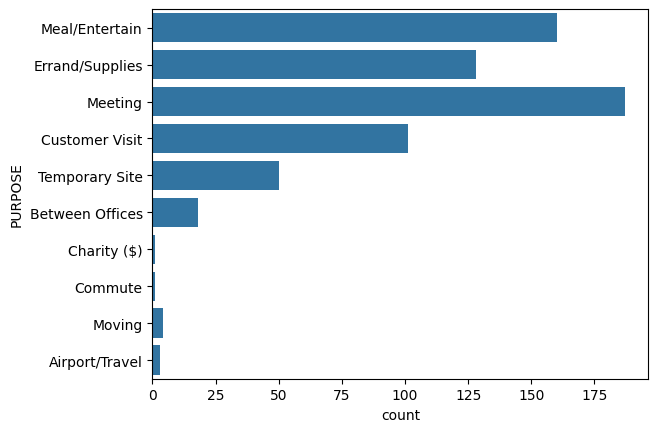

In [11]:
sns . countplot(y= 'PURPOSE' ,data=uber_data)

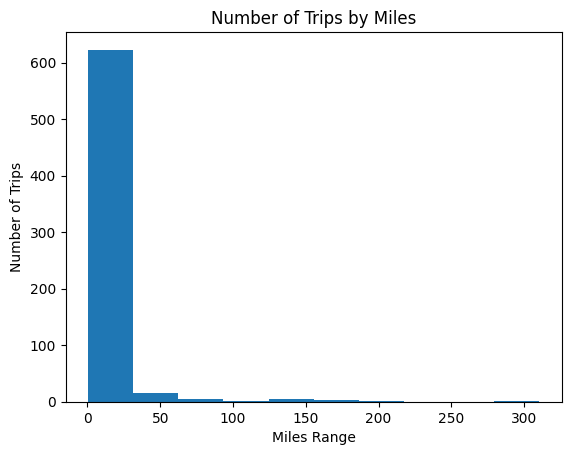

In [12]:
uber_data[ 'MILES' ].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Text(0.5, 1.0, 'Number of trips Vs hours')

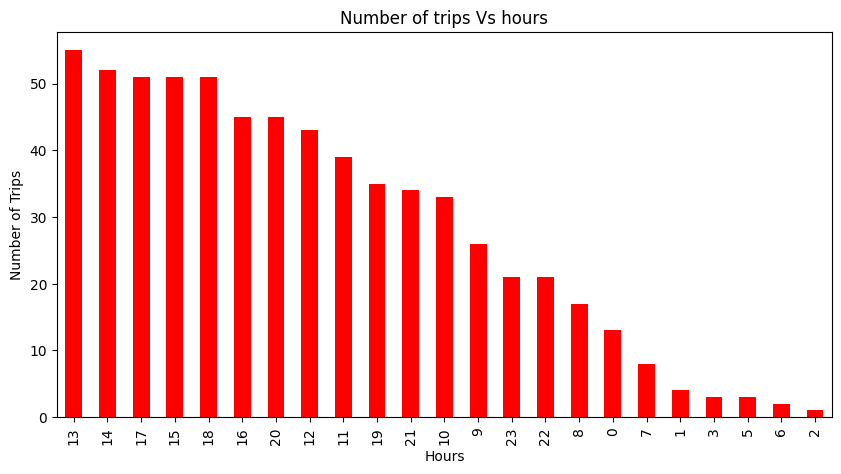

In [13]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

Text(0.5, 1.0, 'Number of trips Vs days')

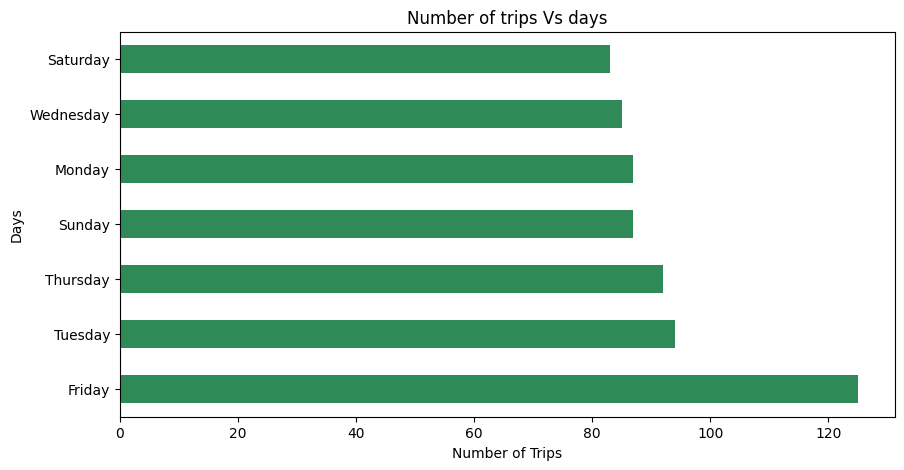

In [14]:
days = uber_data[ 'WEEKDAY' ].value_counts()
days.plot(kind='barh', color= 'seagreen', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

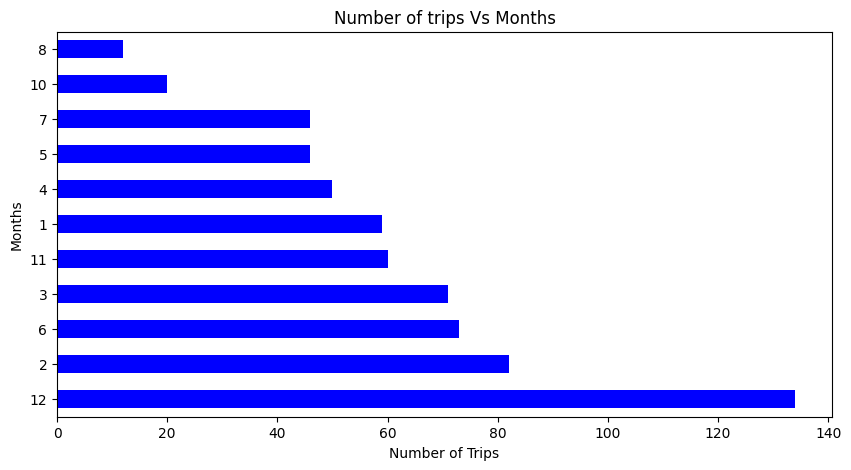

In [15]:
months = uber_data[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

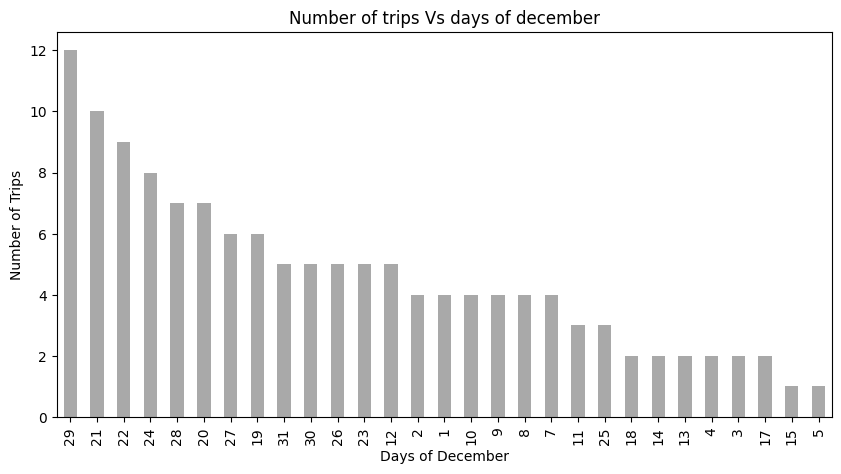

In [17]:
months = uber_data[ 'DAY' ][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

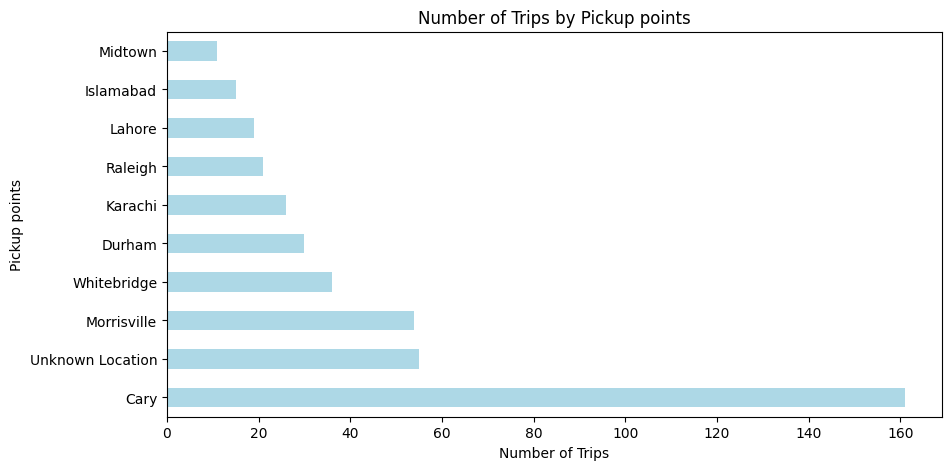

In [18]:
pic_point = uber_data[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

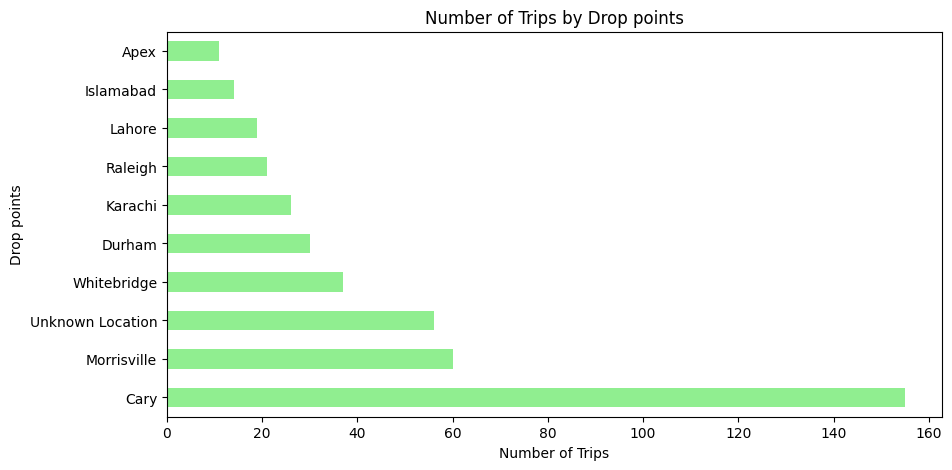

In [19]:
drop_point = uber_data[ 'STOP' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

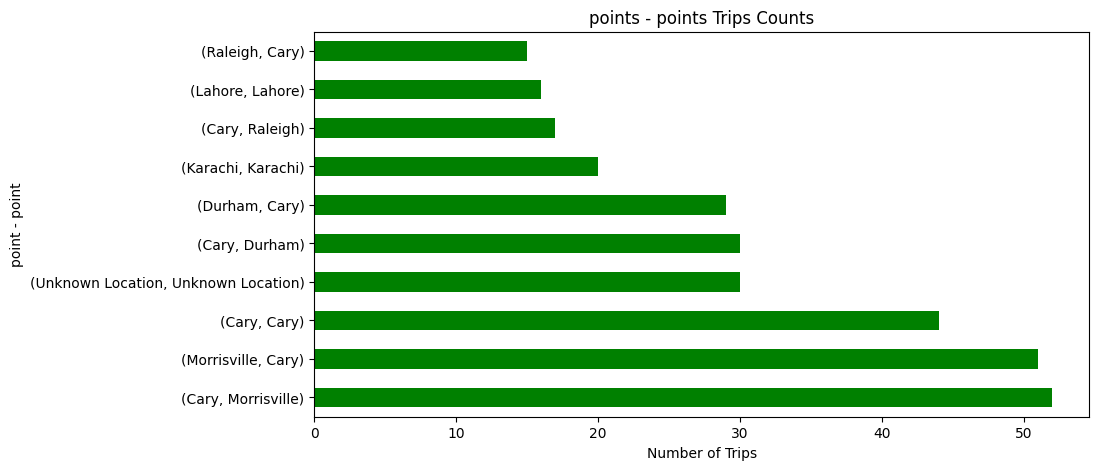

In [20]:
p_p = uber_data[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

In [21]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698


In [22]:
# Exporting tha data in csv format for visualization job...

# uber_data.to_csv('uber_data01.csv', index=False)

Exploratory Data Analysis of Boston Uber Data

In [26]:
data2 = pd.read_csv('rideshare_kaggle.csv' )

In [29]:
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [30]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1',
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)

In [31]:
data2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [32]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
1208,1c0bfa09-ae62-4cde-8b69-5f23ae3480c1,1.543822e+09,7,3,12,2018-12-03 07:23:05,America/New_York,West End,Boston University,Lyft,...,Foggy in the morning.,0.00,1.44,57.87,32.80,1.543921e+09,cloudy,1000.81,42.96,57.87
614,2228414f-01b5-4374-aa96-2afae08c869d,1.544735e+09,21,13,12,2018-12-13 21:00:15,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,Partly cloudy throughout the day.,0.00,3.49,33.78,26.58,1.544789e+09,partly-cloudy-night,1034.39,17.85,33.78
630,2b54f5ad-72be-4fa1-b97a-1743a9d8488c,1.543556e+09,5,30,11,2018-11-30 05:33:02,America/New_York,Financial District,South Station,Uber,...,Mostly cloudy throughout the day.,0.00,5.00,42.64,31.57,1.543658e+09,clear-night,1013.87,28.78,42.64
1539,a74e3d49-a128-4e0f-9414-81507e8f0ebc,1.543316e+09,10,27,11,2018-11-27 10:45:23,America/New_York,Fenway,West End,Uber,...,Light rain in the morning.,1.00,7.42,46.91,33.82,1.543399e+09,rain,989.98,36.34,46.91
476,dc435ed9-3de3-4484-821e-465e28586b4d,1.543845e+09,13,3,12,2018-12-03 13:58:05,America/New_York,North End,Financial District,Uber,...,Foggy in the morning.,0.00,5.84,56.89,33.73,1.543921e+09,cloudy,999.95,43.10,56.89
1159,5aadf834-c103-4b1b-a971-5c6a954ff6b6,1.543272e+09,22,26,11,2018-11-26 22:42:24,America/New_York,Back Bay,Fenway,Lyft,...,"Rain until morning, starting again in the eve...",0.42,7.02,46.46,42.17,1.543298e+09,rain,1009.43,40.67,46.46
1521,593cedce-3b91-49f3-ad47-e8340e57a891,1.543696e+09,20,1,12,2018-12-01 20:23:00,America/New_York,Financial District,South Station,Lyft,...,Light rain in the morning and overnight.,0.00,3.70,44.76,34.95,1.543712e+09,partly-cloudy-day,1022.92,31.57,44.76
1687,ab2db53e-9adf-4a5b-860e-5d61802f02c6,1.543604e+09,18,30,11,2018-11-30 18:52:57,America/New_York,South Station,Beacon Hill,Uber,...,Overcast throughout the day.,0.00,3.48,42.13,30.17,1.543662e+09,cloudy,1015.98,28.90,42.13
1543,212274e2-f6a1-44a3-8279-b7ab9a175d7c,1.545096e+09,1,18,12,2018-12-18 01:15:07,America/New_York,South Station,Theatre District,Lyft,...,Light rain in the morning.,0.00,11.36,41.51,24.05,1.545134e+09,partly-cloudy-night,1001.16,34.24,41.51
262,54d8c73f-b50f-4ea2-be4d-4271386c5aef,1.543451e+09,0,29,11,2018-11-29 00:29:07,America/New_York,Back Bay,Boston University,Uber,...,Mostly cloudy throughout the day.,0.00,12.21,42.72,37.59,1.543486e+09,partly-cloudy-night,996.21,33.82,42.72


In [33]:
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                      0
timestamp               0
hour                    0
day                     0
month                   0
datetime                0
timezone                0
source                  0
destination             0
cab_type                0
product_id              0
name                    0
price                 165
distance                0
surge_multiplier        0
latitude                0
longitude               0
temperature             0
short_summary           0
long_summary            0
precipProbability       0
windGust                0
temperatureHigh         1
temperatureLow          1
temperatureLowTime      1
icon                    1
pressure                1
temperatureMin          1
temperatureMax          1
dtype: int64
172


Analysis

Text(0.5, 1.0, 'Number of trips Vs hours')

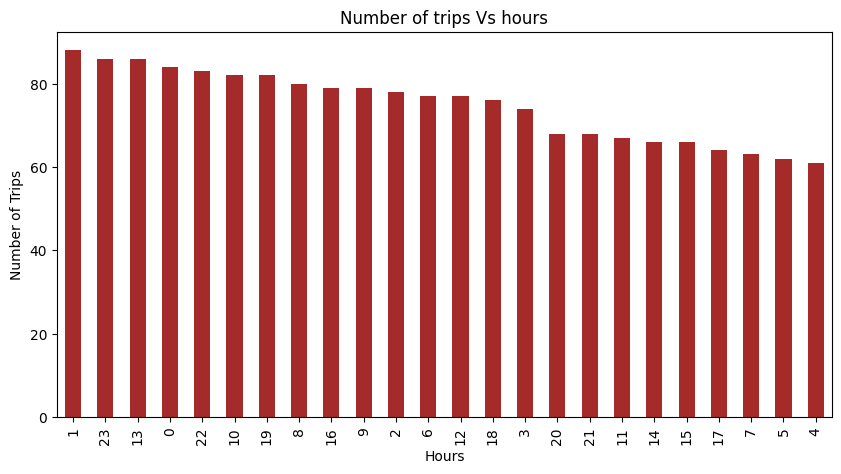

In [34]:
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [36]:
day_week = pd.to_datetime(data2['datetime'], format="%Y/%m/%d %H:%M:%S", errors='coerce').dt.dayofweek
day_week = day_week.apply(lambda x: calendar.day_name[x] if pd.notnull(x) else None)
day_week = pd.Series(day_week)

Monday       4
Wednesday    3
Friday       3
Tuesday      2
Thursday     1
Sunday       1
Saturday     1
Name: count, dtype: int64


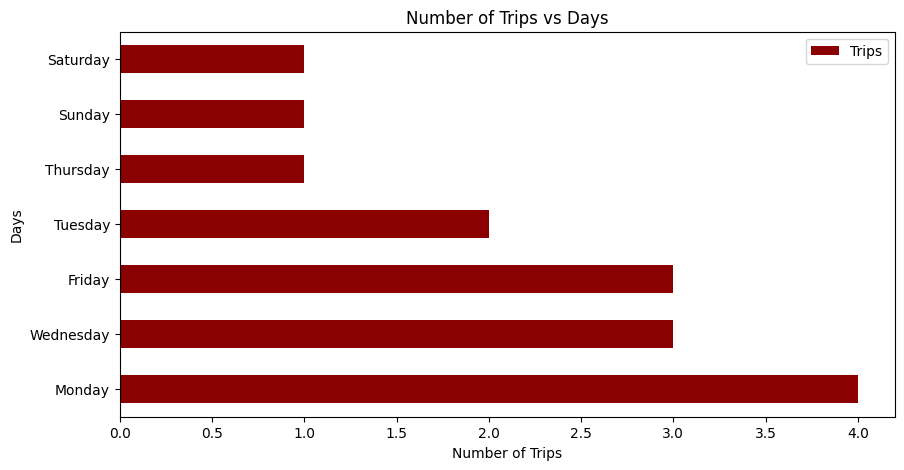

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (ensure this is what you have in `day_week`)
day_week = pd.Series([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
    'Monday', 'Wednesday', 'Friday', 'Friday', 'Sunday', 'Tuesday',
    'Monday', 'Saturday', 'Wednesday'
])

# Get the value counts (number of occurrences of each day)
days = day_week.value_counts()

# Print the value counts to check if it contains valid data
print(days)

# Reset the index to ensure it's suitable for plotting (optional)
days = days.reset_index()
days.columns = ['Day', 'Trips']  # Renaming columns if needed

# Plot the horizontal bar chart
days.plot(kind='barh', x='Day', y='Trips', color='darkred', figsize=(10, 5))

# Add labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Days')
plt.title('Number of Trips vs Days')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Number of trips Vs Months')

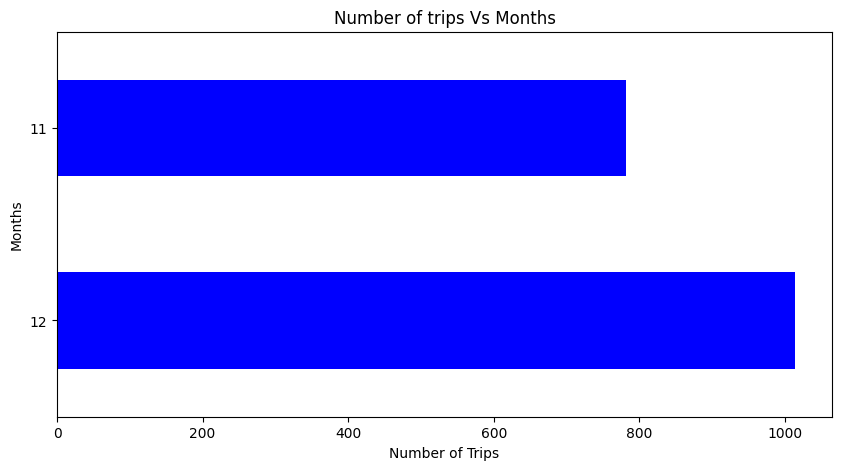

In [43]:
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

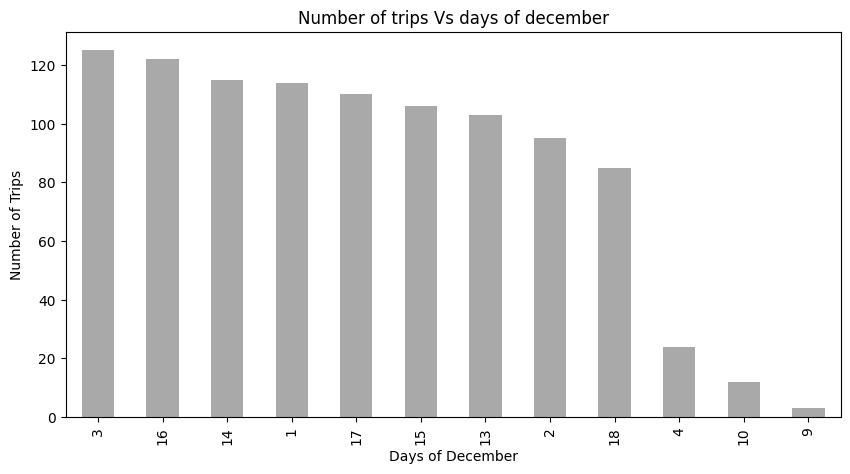

In [44]:
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

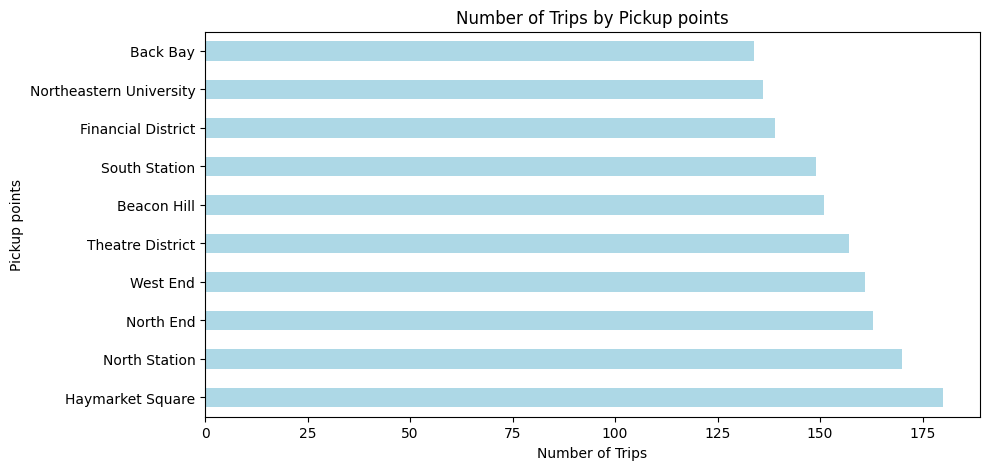

In [45]:
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

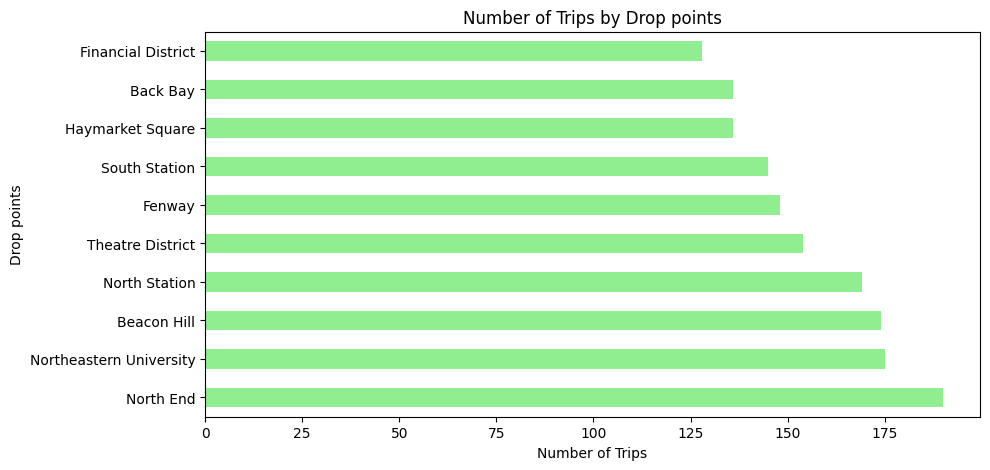

In [46]:
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

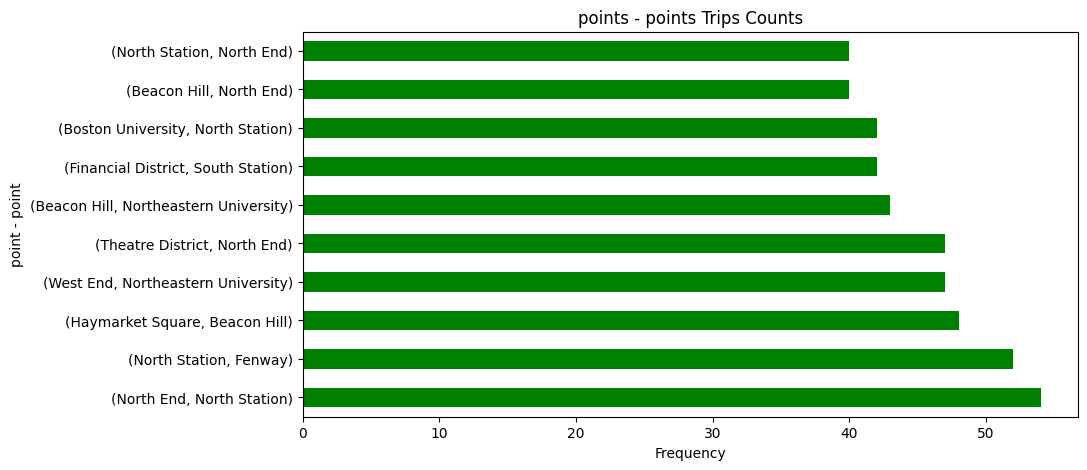

In [47]:
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

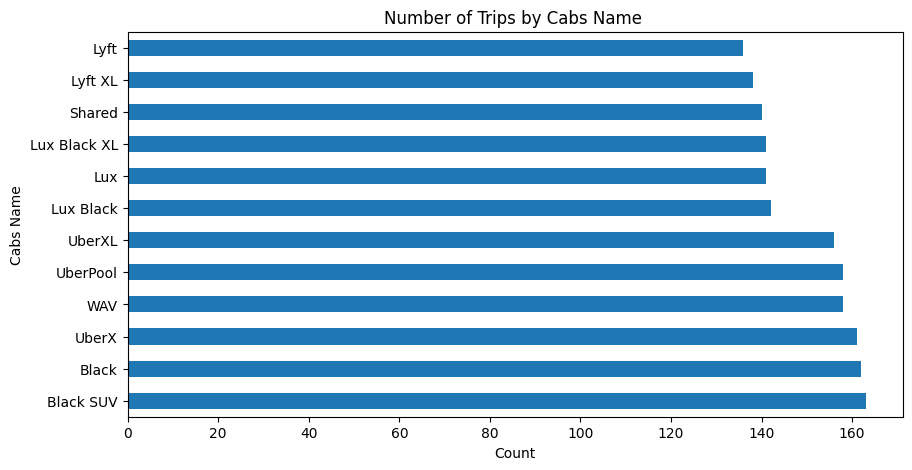

In [48]:
cabs = data2['name'].value_counts()
cabs.plot(kind='barh',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [49]:
# Exporting tha data in csv format for visualization job...

# data2.to_csv('uber_data02.csv', index=False)

Predictive Analysis for Uber Price Prediction using Machine Learning

In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [51]:
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

In [52]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [53]:
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [55]:
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4
5 --> 5
6 --> 6


In [56]:
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [57]:
len(data2[data2['cab_type']==1])

958

Create the Training Dataset

In [58]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

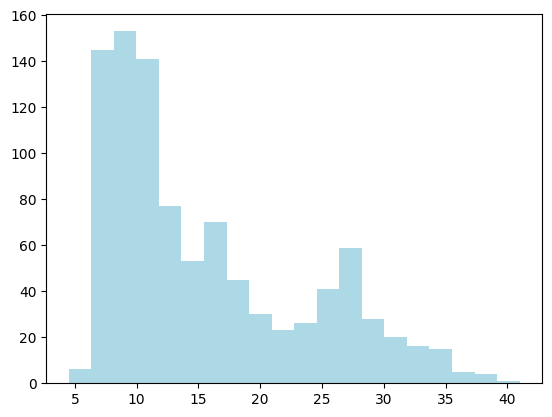

In [60]:
plt.hist(y, bins=20, color = 'lightblue')
plt.show()

Import the sklearn Module

In [61]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble

In [62]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))


    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test))


    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test))


    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test))

    return [lr_model, dt_model, rf_model, gbm_model]

In [63]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [64]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6416808067772326
Decision Tree... 
0.9268325693934585
Random Forest... 
0.946422038127035
GBM... 
0.9429059424425824


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0),
 GradientBoostingRegressor(max_depth=5, n_estimators=200)]

In [65]:
model_list = train_test_models(x_train, y_train, x_test, y_test)
n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f"{model}->{nf} features")
        feature_eliminate(model, x, y, nf)

Linear Regression... 
0.6416808067772326
Decision Tree... 
0.9268325693934585
Random Forest... 
0.946422038127035
GBM... 
0.9425518915948826
LinearRegression()->5 features
0.6533531306563909
LinearRegression()->10 features
0.6540416662466451
LinearRegression()->15 features
0.6455461160171263
LinearRegression()->20 features
0.6433326410095705
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.9292774827119584
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9273593995860995
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9235689704620902
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9261470755029524
RandomForestRegressor(n_estimators=20, random_state=0)->5 features
0.952937536434355
RandomForestRegressor(n_estimators=20, random_state=0)->10 features
0.9535162915830862
RandomForestRegressor(n_estimators=20, random_state=0)->15 features
0.9522412441972828
RandomForestRegressor(n_estimators=20, random_state=0)->20 fea